<a href="https://colab.research.google.com/github/ITU-Business-Analytics-Team/Business_Analytics_for_Professionals/blob/main/Part%20II%20%3A%20Business%20Applications/Chapter%2013%3A%20Financial%20Analytics/13_5_Investment_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Financial Analytics**
## Investment Analytics

In [ ]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

In [ ]:
#Import Data
url=   'https://docs.google.com/spreadsheets/d/1SPzgIovx2kYw14WPCWsszP3eAiigGUXA/edit?usp=sharing&ouid=108589602591644119588&rtpof=true&sd=true' #Stock Prices Dataset
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
#path = "StockPrices.xlsx"
df = pd.read_excel(path,index_col='Date')
stocks = df.columns.tolist()[:5]
df.head()

,AAPL,AMZN,FB,GOOGL,MSFT,NASDAQ
Date,,,,,,
2016-01-04,26.3375,636.99,102.22,759.44,54.80,4497.857
2016-01-05,25.6775,633.79,102.73,761.53,55.05,4484.180
2016-01-06,25.1750,632.65,102.97,759.33,54.05,4443.985
2016-01-07,24.1125,607.94,97.92,741.00,52.17,4305.724
2016-01-08,24.2400,607.05,97.33,730.91,52.33,4270.782


### Return & Risk Calculations
We have 5 stocks and 5 year closing prices of these assets. Fistly, we are calculating daily returns. Daily returns can be formulated and calculated as follows:
$$Return_{t}=\frac{Price_{t}-Price_{t-1}}{Price_{t}}$$

In [ ]:
returns = df.pct_change()
returns.head()

,AAPL,AMZN,FB,GOOGL,MSFT,NASDAQ
Date,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,-0.025059,-0.005024,0.004989,0.002752,0.004562,-0.003041
2016-01-06,-0.019570,-0.001799,0.002336,-0.002889,-0.018165,-0.008964
2016-01-07,-0.042205,-0.039058,-0.049043,-0.024140,-0.034783,-0.031112
2016-01-08,0.005288,-0.001464,-0.006025,-0.013617,0.003067,-0.008115


Now, we are compounding daily returns over time

In [ ]:
daily_cum_returns=(1+returns).cumprod() - 1
daily_cum_returns.head()

,AAPL,AMZN,FB,GOOGL,MSFT,NASDAQ
Date,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,-0.025059,-0.005024,0.004989,0.002752,0.004562,-0.003041
2016-01-06,-0.044139,-0.006813,0.007337,-0.000145,-0.013686,-0.011977
2016-01-07,-0.084480,-0.045605,-0.042066,-0.024281,-0.047993,-0.042717
2016-01-08,-0.079639,-0.047002,-0.047838,-0.037567,-0.045073,-0.050485


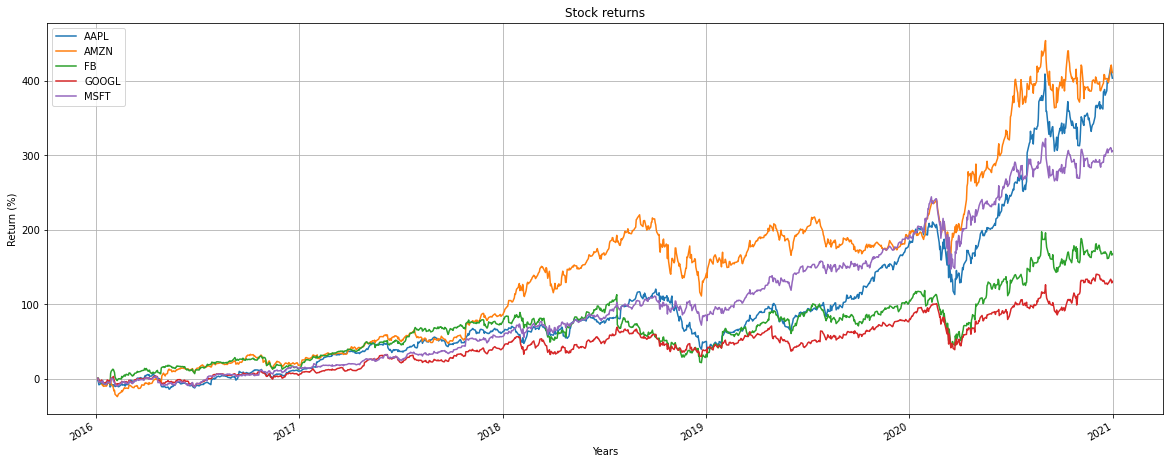

In [ ]:
fig, ax = plt.subplots(1,figsize=(20,8))

(daily_cum_returns[stocks]*100).plot(ax=ax) 
ax.set_title('Stock returns')
ax.set_xlabel("Years") 
ax.set_ylabel("Return (%)") 
ax.legend(stocks)
ax.grid()
plt.show()

We can also calculate yearly returns

In [ ]:
yearly_returns = returns.groupby(returns.index.year).apply(lambda x: (x + 1).prod() - 1)
yearly_returns.head()

,AAPL,AMZN,FB,GOOGL,MSFT,NASDAQ
Date,,,,,,
2016,0.099383,0.177208,0.125514,0.043466,0.133942,0.081319
2017,0.461147,0.559564,0.533768,0.329295,0.376569,0.315157
2018,-0.067896,0.284317,-0.257112,-0.008012,0.187398,-0.010390
2019,0.861608,0.230278,0.565718,0.281762,0.552624,0.379640
2020,0.807458,0.762561,0.330865,0.308536,0.410399,0.475802


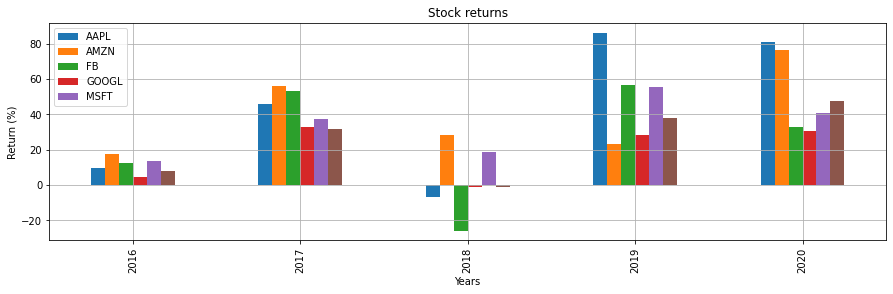

In [ ]:
fig, ax = plt.subplots()
fig.set_figwidth(15)
(yearly_returns*100).plot.bar(ax=ax) 
ax.set_title('Stock returns')
ax.set_xlabel("Years") 
ax.set_ylabel("Return (%)") 
ax.legend(["AAPL","AMZN","FB","GOOGL","MSFT"])
ax.grid()
plt.show()

We can also calculate expected (annualized) returns of stocks

In [ ]:
expected_returns = returns[stocks].mean()*252
expected_returns[:5]

AAPL     0.369766
AMZN     0.372832
FB       0.251597
GOOGL    0.202347
MSFT     0.319338
dtype: float64

We are now calculating volatility of the stocks by calculating standard deviation of each of them 

In [ ]:
volatility = returns.std()
volatility

AAPL      0.019025
AMZN      0.019100
FB        0.020754
GOOGL     0.016592
MSFT      0.017492
NASDAQ    0.014006
dtype: float64

To find annualized volatility, we need to multiply our daily standard deviation by the square root of 252

In [ ]:
annualized_vol = volatility * np.sqrt(252)
annualized_vol

AAPL      0.302014
AMZN      0.303198
FB        0.329467
GOOGL     0.263386
MSFT      0.277677
NASDAQ    0.222335
dtype: float64

To obtain volatility of the portfolio, we are firstly calculating the portfolio variance. Portfolio variance is formulated as follows:
$$\sigma_{p}^{2}=w_{1}^{2}\sigma_{1}^{2}+w_{2}^{2}\sigma_{2}^{2}+w_{1}w_{1}\sigma_{1,2}$$
$\sigma_{p}^{2}$: Variance of the portfolio <br/>
$w_{n}$: Weight of the nth asset <br/>
$\sigma_{n}^{2}$: Variance of the nth asset <br/>
$\sigma_{1,2}$: Covariance between asset 1 and 2

Matrix notation of the above formula can be formulated as follows:
$$\sigma_{p}^{2}=\begin{bmatrix}w_{1} w_{2}\end{bmatrix}\begin{bmatrix}\sigma_{1}^{2} \sigma_{1,2} \\ \sigma_{2,1} \sigma_{2}^{2}\end{bmatrix}\begin{bmatrix}w_{1} \\ w_{2}\end{bmatrix}$$

In [ ]:
# Construct a covariance matrix and multiply with 252 to convert it to annualize
stock_returns = returns[["AAPL","AMZN","FB","GOOGL","MSFT"]]
cov_matrix = stock_returns.cov()*252
cov_matrix

,AAPL,AMZN,FB,GOOGL,MSFT
AAPL,0.091213,0.054637,0.057822,0.052119,0.059738
AMZN,0.054637,0.091929,0.062251,0.052957,0.057653
FB,0.057822,0.062251,0.108549,0.060154,0.057762
GOOGL,0.052119,0.052957,0.060154,0.069372,0.057143
MSFT,0.059738,0.057653,0.057762,0.057143,0.077104


In [ ]:
#Give some weights to stocks
weights = np.array([0.1 , 0.2, 0.15, 0.3, 0.25])

In [ ]:
port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
print ("Portfolio Variance: {:.2%}".format(port_variance))

Portfolio Variance: 6.23%


In [ ]:
port_std = np.sqrt(port_variance)
print ("Portfolio Volatility: {:.2%}".format(port_std))

Portfolio Volatility: 24.96%


### Capital Asset Pricing Model
Beta of an asset can be calculated as follows:

$$R_{i}=R_{f}+B_{i}(R_{m}-R_{f})$$
If we assume the risk-free rate as 0, we can then calculate CAPM for assets as follows

In [ ]:
#Calculate beta for a single stock
beta, alpha = np.polyfit(returns['NASDAQ'].iloc[1:], returns['AAPL'].iloc[1:], 1)
print ("Beta of the AAPL: {:.2}".format(beta))

Beta of the AAPL: 1.1


In [ ]:
#Calculate the beat of all stocks
beta = {}
alpha = {}
for i in returns.columns:
    if i != 'NASDAQ':
        b, a = np.polyfit(returns['NASDAQ'].iloc[1:], returns[i].iloc[1:], 1) 
        beta[i] = b   
        alpha[i] = a

In [ ]:
beta

{'AAPL': 1.1361661480918663,
 'AMZN': 1.0377414741561533,
 'FB': 1.0860582874204634,
 'GOOGL': 1.0034937113106732,
 'MSFT': 1.1302217410138338}

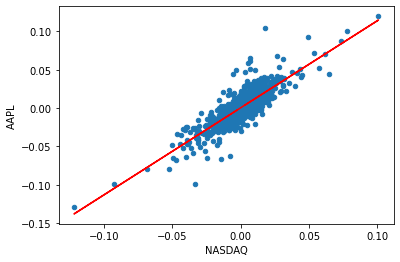

In [ ]:
#Plot return of AAPL stock vs market
returns.plot(kind = 'scatter', x = 'NASDAQ', y = 'AAPL') 
plt.plot(returns['NASDAQ'], beta['AAPL'] * returns['NASDAQ'] + alpha['AAPL'], '-', color = 'r') 
plt.show()

In the CAPM, beta is used to describe the relationship between sys-tematic risk and an asset's expected return. Higher beta indicates that the asset is more volatile than the market. The CAPM is also graph-ically illustrated as the Security market line (SML). As a straight line intersecting the vertical axis at the risk-free rate, SML depicts the risk-return trade-off.

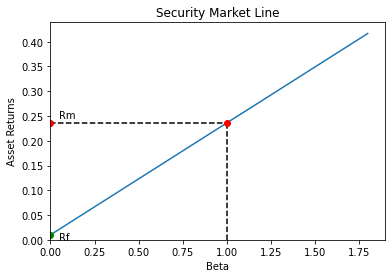

In [ ]:
#Security Market Line
betas = [(x-2)/10 for x in range(21)]
rm=returns.iloc[1:]["NASDAQ"].mean()*252
rf=0.01
assetReturns = [rf+(rm-rf)*x for x in betas]

f, ax = plt.subplots(1)
xdata = betas
ydata = assetReturns
ax.plot(xdata, ydata)
ax.set_xlim(xmin=0)
ax.set_ylim(ymin=0)

ax.plot(0,rf,"go")
plt.text(0.05, rf - 0.01, 'Rf')

ax.plot(1,rm,"ro")
ax.plot(0,rm,"ro")
plt.text(0.05, rm + 0.01, 'Rm')
plt.xlabel("Beta")
plt.ylabel("Asset Returns")
plt.title("Security Market Line")
ax.vlines(1, 0, rm, linestyle="dashed")
ax.hlines(rm, 0, 1, linestyle="dashed")
plt.show(f)

### Fama-French Multi Factor Model
This model is usually expressed as a three-factor model that improves the CAPM (single factor model). These three factors are market, size and value factors. In the formula below, R_m-R_f  represents the market factor, SMB represents the size factor and HML represents the value factor.

$$R_{i}=R_{f}+β_{m} (R_{m}-R_{f})+B_{s} SMB+B_{h} HML$$


In [ ]:
#Import Factor Data
url=   'https://docs.google.com/spreadsheets/d/1VGOocIaegOjg7dEBPvdEO_GxOiNTFSQ5/edit?usp=sharing&ouid=108589602591644119588&rtpof=true&sd=true'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
#path = "Factors.xlsx"
factors = pd.read_excel(path,index_col='Date')
factors.head()

,Mkt-RF,SMB,HML,RF
Date,,,,
2016-01-04,-1.59,-0.83,0.55,0.0
2016-01-05,0.12,-0.23,0.03,0.0
2016-01-06,-1.35,-0.12,-0.03,0.0
2016-01-07,-2.44,-0.29,0.06,0.0
2016-01-08,-1.11,-0.48,-0.04,0.0


In [ ]:
port_returns = pd.DataFrame((weights * stock_returns.dropna()).sum(axis=1),columns=['Ri'])
port_returns.head()

,Ri
Date,
2016-01-05,-0.000796
2016-01-06,-0.007374
2016-01-07,-0.035326
2016-01-08,-0.003986
2016-01-11,0.006162


In [ ]:
#Join factor data with AAPL return data
df_factors = pd.merge(port_returns.dropna(),factors,left_index=True,right_index=True, how='inner')
df_factors.head()

,Ri,Mkt-RF,SMB,HML,RF
Date,,,,,
2016-01-05,-0.000796,0.12,-0.23,0.03,0.0
2016-01-06,-0.007374,-1.35,-0.12,-0.03,0.0
2016-01-07,-0.035326,-2.44,-0.29,0.06,0.0
2016-01-08,-0.003986,-1.11,-0.48,-0.04,0.0
2016-01-11,0.006162,-0.06,-0.63,0.33,0.0


In [ ]:
df_factors['Ri'] = df_factors['Ri'] - df_factors['RF']
df_factors.drop(columns=['RF'], inplace=True)

In [ ]:
import statsmodels.api as sm
X=df_factors.iloc[:,1:]
X = sm.add_constant(X)
X.rename(columns = {"const":"alpha"}, inplace = True)
y= df_factors['Ri'].values.ravel()
result = sm.OLS(y, X).fit()
coeff = result.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     1413.
Date:                Mon, 08 Nov 2021   Prob (F-statistic):               0.00
Time:                        20:51:43   Log-Likelihood:                 4334.0
No. Observations:                1258   AIC:                            -8660.
Df Residuals:                    1254   BIC:                            -8639.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
alpha         -0.0040      0.000    -18.336      0.0

In [ ]:
print("We obtain betas of sample portfolio as:\n{0}".format(result.params[1:]))

We obtain betas of sample portfolio as:
Mkt-RF    0.011548
SMB      -0.002009
HML      -0.005568
dtype: float64


### Modern Portfolio Theory
The efficient frontier is a graph showing the rate of return corresponding to volatility. It includes optimal sets of portfolios that offer the highest expected return for a given level of risk or the lowest risk for a given expected return level. If we derive the points, assuming all possible weights with different combinations of assets, we arrive at the efficient frontier chart.

In [ ]:
#Efficient Frontier
p_ret = [] # Portfolio returns
p_vol = [] # Portfolio volatility
p_weights = [] # Portfolio weights

num_assets = 5
num_portfolios = 100000 # We can reduce the number of portfolio, to decrease processing time
for i in range(num_portfolios):
    w = np.random.random(num_assets) #Random weights for the stocks
    w = w/np.sum(w)
    p_weights.append(w)
    p_returns = np.dot(w, stock_returns.mean()*252) # Portfolio return
    p_ret.append(p_returns)
    
    var = np.dot(w.T, np.dot(cov_matrix, w)) # Portfolio Variance
    sd = np.sqrt(var) # Portfolio Volatility
    p_vol.append(sd)

In [ ]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for i, stock in enumerate(df.columns.tolist()[:5]):
    data[stock] = [w[i] for w in p_weights]
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,AAPL,AMZN,FB,GOOGL,MSFT
0,0.297434,0.250052,0.119910,0.242871,0.147142,0.264771,0.225306
1,0.340606,0.257609,0.360948,0.319535,0.124595,0.047755,0.147168
2,0.262883,0.251161,0.001794,0.266682,0.052657,0.574783,0.104084
3,0.321964,0.251332,0.304782,0.298947,0.030735,0.227826,0.137710
4,0.275058,0.255442,0.131674,0.190173,0.298922,0.349118,0.030113


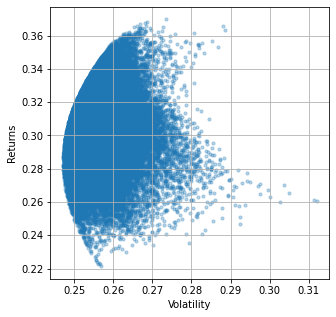

In [ ]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[5,5])

In [ ]:
#Minimum Volatility Portfolio
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
min_vol_port

Returns       0.285970
Volatility    0.247200
AAPL          0.201521
AMZN          0.163261
FB            0.023160
GOOGL         0.433326
MSFT          0.178732
Name: 40555, dtype: float64

Text(0.2522003160492265, 0.28396956601337486, 'Minimum Volatility Portfolio')

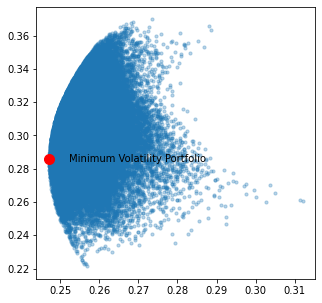

In [ ]:
# Plot the minimum volatility portfolio
plt.subplots(figsize=[5,5])
plt.scatter(portfolios['Volatility'], portfolios['Returns'], marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='o', s=100)
plt.text(min_vol_port[1] + 0.005, min_vol_port[0] - 0.002, 'Minimum Volatility Portfolio')

In [ ]:
max_sharpe_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
max_sharpe_port

Returns       0.365157
Volatility    0.265298
AAPL          0.465365
AMZN          0.426658
FB            0.006316
GOOGL         0.000378
MSFT          0.101283
Name: 21464, dtype: float64

Text(0.2702980439489218, 0.36315691728376337, 'Maximum Sharpe \nRatio Portfolio')

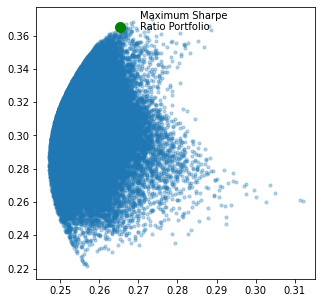

In [ ]:
# Plot the maximum Sharpe portfolio
plt.subplots(figsize=[5,5])
plt.scatter(portfolios['Volatility'], portfolios['Returns'], marker='o', s=10, alpha=0.3)
plt.scatter(max_sharpe_port[1], max_sharpe_port[0], color='g', marker='o', s=100)
plt.text(max_sharpe_port[1] + 0.005, max_sharpe_port[0] - 0.002, 'Maximum Sharpe \nRatio Portfolio')

In [ ]:
#Capital Allocation Line
cal_coeff = np.polyfit([0,max_sharpe_port[1]], [rf,max_sharpe_port[0]], 1)
cal_coeff

array([1.33870914, 0.01      ])

Text(0.01, 0.005, 'Risk-free Rate')

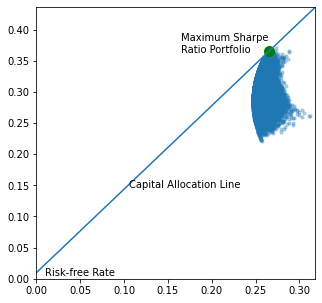

In [ ]:
plt.subplots(figsize=[5,5])
plt.scatter(portfolios['Volatility'], portfolios['Returns'], marker='o', s=10, alpha=0.3)
plt.scatter(max_sharpe_port[1], max_sharpe_port[0], color='g', marker='o', s=100)

cal_x = np.linspace(0,max_sharpe_port[1]*1.2,100)
cal_y = cal_coeff[0]*cal_x+cal_coeff[1]
plt.plot(cal_x, cal_y)
plt.xlim(0,cal_x[-1])
plt.ylim(0, cal_y[-1])
plt.text(max_sharpe_port[1] - 0.1, max_sharpe_port[0] - 0.002, 'Maximum Sharpe \nRatio Portfolio')
plt.text(cal_x[-1]/3, cal_y[-1]/3, 'Capital Allocation Line')
plt.text(0.01, rf - 0.005, 'Risk-free Rate')

In [ ]:
portfolio_returns = pd.DataFrame((max_sharpe_port[stocks]* returns[stocks]).sum(axis=1),columns=["Return"])

In [ ]:
portfolio_returns.mean()*252

Return    0.364867
dtype: float64

In [ ]:
max_sharpe_port["Returns"]

0.36515691728376337

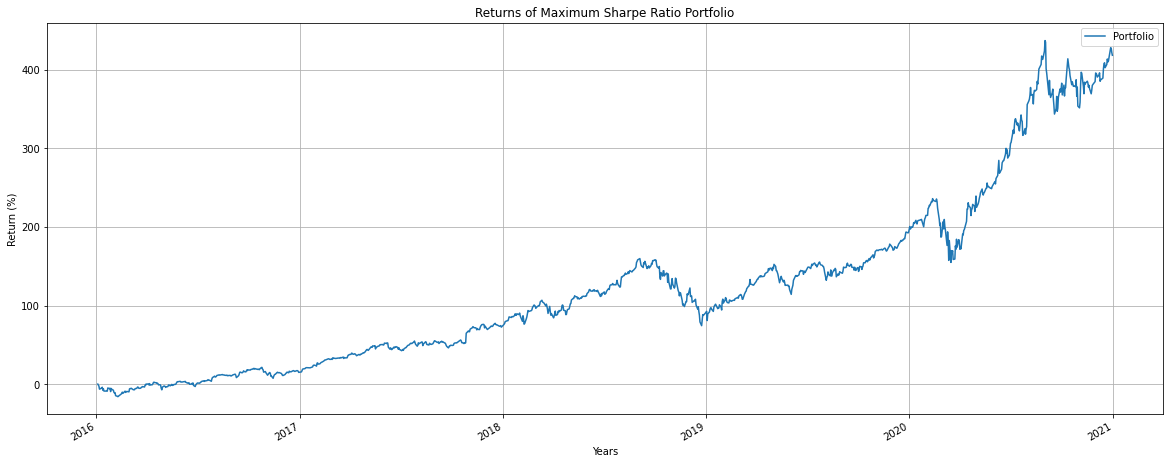

In [ ]:
portfolio_cum_returns=(1+portfolio_returns).cumprod() - 1
fig, ax = plt.subplots(1,figsize=(20,8))

(portfolio_cum_returns["Return"]*100).plot(ax=ax) 
ax.set_title('Returns of Maximum Sharpe Ratio Portfolio')
ax.set_xlabel("Years") 
ax.set_ylabel("Return (%)") 
ax.legend(["Portfolio"])
ax.grid()
plt.show()

### Performance Metrics

In [ ]:
#Performance Metrics
def sharpe_ratio(rp, rf, vol):
    return (rp - rf)/vol

def sortino_ratio(rp, rf, downsideReturns):
    return (rp - rf)/(downsideReturns.std().values[0]*np.sqrt(252))

def portfolio_beta(w, betas):
    return (w*betas).sum()

def treynor_ratio(rp, rf, port_beta):
    return (rp - rf)/port_beta

def max_drawdown(portReturns):
    s=(portReturns+1).cumprod()
    return np.ptp(s)/s.max()

def performance_metrics(weights,returns,rf,betas):
    portfolio_returns = pd.DataFrame((weights* returns[stocks]).sum(axis=1),columns=["Return"])
    vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    print("Volatility: {:.2%}".format(vol))
    expected_return = portfolio_returns["Return"].mean() *252
    print("Expected Return: {:.2%}".format(expected_return))
    print("Sharpe Ratio: {:.3}".format(sharpe_ratio(expected_return,rf,vol)))
    print("Sortino Ratio: {:.3}".format(sortino_ratio(expected_return,rf,portfolio_returns[portfolio_returns["Return"]<0])))
    port_beta = portfolio_beta(weights,pd.DataFrame(beta.items())[1].values)
    print("Beta: {:.3}".format(port_beta))
    print("Treynor Ratio: {:.2}".format(treynor_ratio(expected_return,rf,port_beta)))
    print("Maximum Drawdown: {:.2%}".format(max_drawdown(portfolio_returns["Return"])))

In [ ]:
#Equally Weighted Portfolio
weights = np.array([0.2 , 0.2, 0.2, 0.2, 0.2])
betas = pd.DataFrame(beta.items())[1].values
performance_metrics(weights,returns,rf,betas)

Volatility: 25.16%
Expected Return: 30.29%
Sharpe Ratio: 1.16
Sortino Ratio: 1.43
Beta: 1.08
Treynor Ratio: 0.27
Maximum Drawdown: 77.77%


### Portfolio Optimization

In [ ]:
!pip install PyPortfolioOpt

     |████████████████████████████████| 61 kB 3.5 MB/s 
     |████████████████████████████████| 2.8 MB 12.3 MB/s 
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [ ]:
from pypfopt import risk_models,EfficientFrontier

#### Minimum Volatility Portfolio

In [ ]:
#Minimum Volatility Portfolio
ef = EfficientFrontier(stock_returns.mean()*252, cov_matrix)
weights = ef.min_volatility()
weights = pd.DataFrame(ef.clean_weights().items())[1].values
print(pd.DataFrame(ef.clean_weights(),index=["Weights"]),"\n")
expected_return, vol, sharpe = ef.portfolio_performance(verbose=True,risk_free_rate=rf)
portfolio_returns = pd.DataFrame((weights* returns[stocks]).sum(axis=1),columns=["Return"])

            AAPL     AMZN       FB    GOOGL     MSFT
Weights  0.18104  0.17349  0.02863  0.44853  0.16831 

Expected annual return: 28.3%
Annual volatility: 24.7%
Sharpe Ratio: 1.11


In [ ]:
performance_metrics(weights,returns,rf,betas)

Volatility: 24.71%
Expected Return: 28.31%
Sharpe Ratio: 1.11
Sortino Ratio: 1.36
Beta: 1.06
Treynor Ratio: 0.26
Maximum Drawdown: 75.20%


#### Maximum Sharpe Ratio Portfolio

In [ ]:
#Maximum Sharpe Portfolio
ef = EfficientFrontier(stock_returns.mean()*252, cov_matrix)
weights = ef.max_sharpe(risk_free_rate=rf)
print(pd.DataFrame(ef.clean_weights(),index=["Weights"]),"\n")
weights = pd.DataFrame(ef.clean_weights().items())[1].values
performance_metrics(weights,returns,rf,betas)

            AAPL     AMZN   FB  GOOGL     MSFT
Weights  0.42882  0.44392  0.0    0.0  0.12726 

Volatility: 26.45%
Expected Return: 36.44%
Sharpe Ratio: 1.34
Sortino Ratio: 1.72
Beta: 1.09
Treynor Ratio: 0.32
Maximum Drawdown: 84.42%


#### Maximize Return

In [ ]:
#Maximize Return subject to Target Volatility
ef = EfficientFrontier(stock_returns.mean()*252, cov_matrix)
weights = ef.efficient_risk(target_volatility=0.25)
print(pd.DataFrame(ef.clean_weights(),index=["Weights"]),"\n")
weights = pd.DataFrame(ef.clean_weights().items())[1].values
performance_metrics(weights,returns,rf,betas)

            AAPL     AMZN       FB    GOOGL     MSFT
Weights  0.25791  0.26331  0.00445  0.24297  0.23136 

Volatility: 25.00%
Expected Return: 31.75%
Sharpe Ratio: 1.23
Sortino Ratio: 1.53
Beta: 1.08
Treynor Ratio: 0.29
Maximum Drawdown: 79.60%


#### Minimize Risk 

In [ ]:
#Minimize Risk subject to Target Return
ef = EfficientFrontier(stock_returns.mean()*252, cov_matrix)
weights = ef.efficient_return(target_return=0.3500)
print(pd.DataFrame(ef.clean_weights(),index=["Weights"]),"\n")
weights = pd.DataFrame(ef.clean_weights().items())[1].values
performance_metrics(weights,returns,rf,betas)

            AAPL    AMZN   FB    GOOGL     MSFT
Weights  0.32856  0.3443  0.0  0.03696  0.29018 

Volatility: 25.78%
Expected Return: 34.97%
Sharpe Ratio: 1.32
Sortino Ratio: 1.66
Beta: 1.1
Treynor Ratio: 0.31
Maximum Drawdown: 83.02%


#### Black Litterman

In [ ]:
from pypfopt import black_litterman
from pypfopt.black_litterman import BlackLittermanModel

viewdict = {"AAPL": 0.20, "AMZN": 0.30, "FB": -0.1, "GOOGL": 0.05, "MSFT": 0.15}
bl = BlackLittermanModel(cov_matrix, absolute_views=viewdict)

bl_rets = bl.bl_returns()
ef = EfficientFrontier(bl_rets, cov_matrix)
delta = black_litterman.market_implied_risk_aversion(df['NASDAQ'],risk_free_rate=rf)
bl.bl_weights(delta)
print(pd.DataFrame(bl.clean_weights(),index=["Weights"]),"\n")
weights = pd.DataFrame(bl.clean_weights().items())[1].values
performance_metrics(weights,returns,rf,betas)

            AAPL    AMZN       FB    GOOGL     MSFT
Weights  0.55316  1.0654 -0.78259 -0.19915  0.36318 

Volatility: 36.67%
Expected Return: 48.02%
Sharpe Ratio: 1.28
Sortino Ratio: 1.88
Beta: 1.09
Treynor Ratio: 0.43
Maximum Drawdown: 91.61%


/usr/local/lib/python3.7/dist-packages/pypfopt/black_litterman.py:257: UserWarning: Running Black-Litterman with no prior.
  warnings.warn("Running Black-Litterman with no prior.")


#### **Conclusion**
As a result, we have done portfolio optimization for different objective functions above. Now the results can be compared according to the performance metrics defined. While we found the lowest risk with the 'Minimum Volatility Portfolio' objective function as expected, we reached the highest return with Black & Litterman.